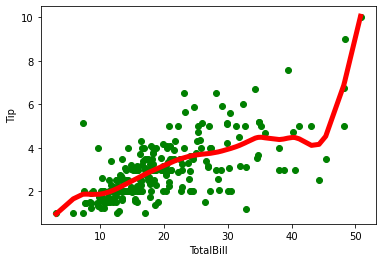

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as npl

def kernel(point,xmat,k):
    m,n=npl.shape(xmat)
    weights=npl.mat(npl.eye((m)))
    for j in range(m):
        diff=point-X[j]
        weights[j,j]=npl.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localweight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    w=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return w

def localWeightRegression(xmat,ymat,k):
    m,n=npl.shape(xmat)
    ypred=npl.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localweight(xmat[i],xmat,ymat,k)
    return ypred

data=pd.read_csv('C:/Users/Gaurav/Desktop/ML Lab/prog10.csv')
bill=npl.array(data.total_bill)
tip=npl.array(data.tip)

mbill=npl.mat(bill)
mtip=npl.mat(tip)
m=npl.shape(mbill)[1]
one=npl.mat(npl.ones(m))
X=npl.hstack((one.T,mbill.T))

ypred=localWeightRegression(X,mtip,2)

sortIndex=X[:,1].argsort(0)
xsort=X[sortIndex][:,0]

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(bill,tip,color='green')
ax.plot(xsort[:,1],ypred[sortIndex],color='red',linewidth=5)
plt.xlabel('TotalBill')
plt.ylabel('Tip')
plt.show()